## Sign Language Detection using ANN

### Step 1: Data Collection and Preprocessing

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelBinarizer
from tensorflow.keras.utils import to_categorical

# Load the dataset (assuming CSV format)
train_data = pd.read_csv('sign_mnist_train.csv')
test_data = pd.read_csv('sign_mnist_test.csv')

# Separate features and labels
X_train = train_data.iloc[:, 1:].values
y_train = train_data.iloc[:, 0].values
X_test = test_data.iloc[:, 1:].values
y_test = test_data.iloc[:, 0].values

# Normalize the pixel values
X_train = X_train / 255.0
X_test = X_test / 255.0

# Reshape the data to fit the model
X_train = X_train.reshape(X_train.shape[0], 28, 28, 1)
X_test = X_test.reshape(X_test.shape[0], 28, 28, 1)

# Encode the labels
lb = LabelBinarizer()
y_train = lb.fit_transform(y_train)
y_test = lb.transform(y_test)


###  Step 2: Exploratory Data Analysis

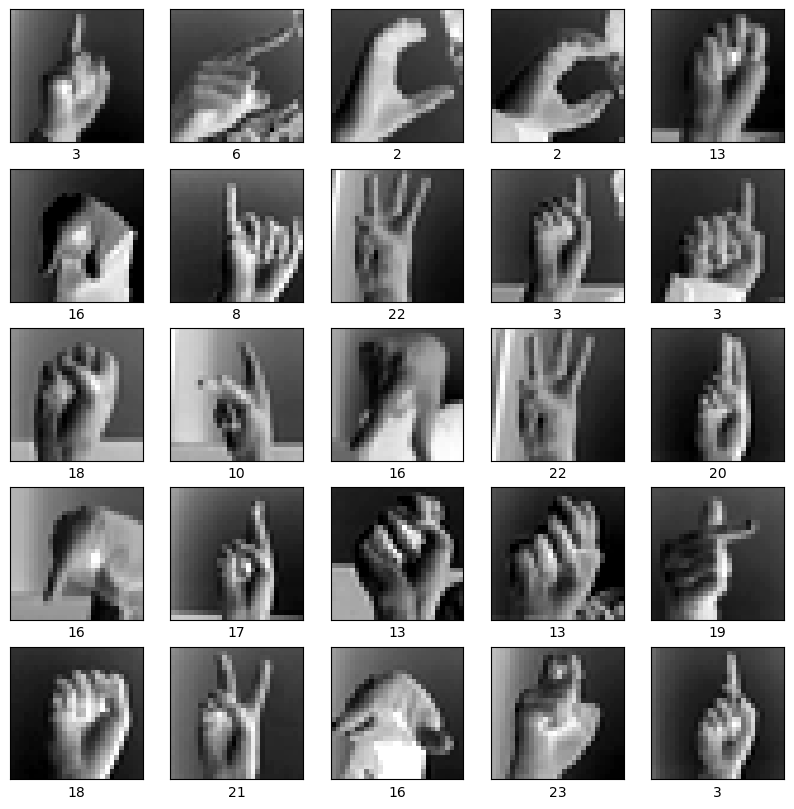

In [5]:
# Plot some sample images
plt.figure(figsize=(10, 10))
for i in range(25):
    plt.subplot(5, 5, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(X_train[i].reshape(28, 28), cmap=plt.cm.binary)
    plt.xlabel(lb.classes_[np.argmax(y_train[i])])
plt.show()


### Step 3: Model Development and Architecture

In [7]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Dropout

# Define the model
model = Sequential([
    Flatten(input_shape=(28, 28, 1)),
    Dense(512, activation='relu'),
    Dropout(0.2),
    Dense(256, activation='relu'),
    Dropout(0.2),
    Dense(24, activation='softmax')
])

# Compile the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])


C:\Users\Priya Milton\anaconda3\Lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


### Step 4: Model Training

In [8]:
# Train the model
history = model.fit(X_train, y_train, epochs=20, validation_data=(X_test, y_test))

Epoch 1/20
858/858 ━━━━━━━━━━━━━━━━━━━━ 8s 7ms/step - accuracy: 0.2074 - loss: 2.6049 - val_accuracy: 0.5531 - val_loss: 1.4439
Epoch 2/20
858/858 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.5629 - loss: 1.3008 - val_accuracy: 0.6128 - val_loss: 1.1626
Epoch 3/20
858/858 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.6939 - loss: 0.8975 - val_accuracy: 0.7157 - val_loss: 0.8772
Epoch 4/20
858/858 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.7544 - loss: 0.7050 - val_accuracy: 0.7179 - val_loss: 0.8356
Epoch 5/20
858/858 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.7973 - loss: 0.5716 - val_accuracy: 0.7320 - val_loss: 0.7926
Epoch 6/20
858/858 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.8341 - loss: 0.4803 - val_accuracy: 0.7386 - val_loss: 0.8165
Epoch 7/20
858/858 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.8464 - loss: 0.4344 - val_accuracy: 0.7889 - val_loss: 0.6926
Epoch 8/20
858/858 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.8629 - loss: 0.3943 - val_accuracy: 0.

### Step 5: Model Evaluation

225/225 - 1s - 3ms/step - accuracy: 0.7998 - loss: 0.7863

Test accuracy: 0.7997769117355347


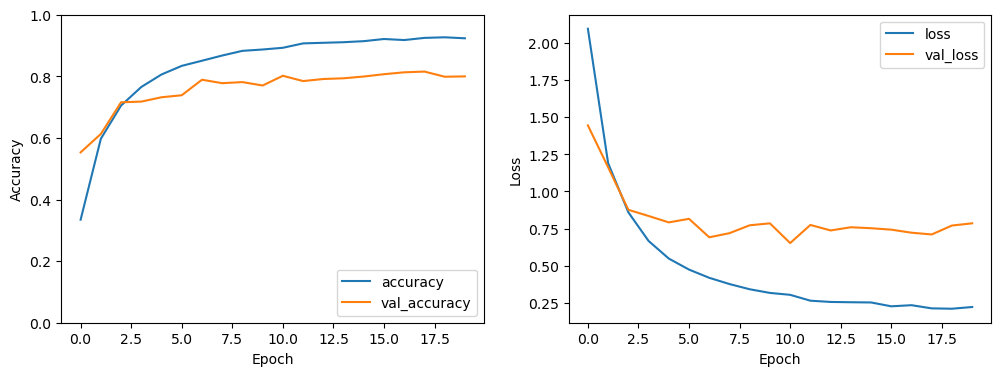

In [9]:
# Evaluate the model
test_loss, test_acc = model.evaluate(X_test, y_test, verbose=2)

print('\nTest accuracy:', test_acc)

# Plot training history
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0, 1])
plt.legend(loc='lower right')

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label = 'val_loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(loc='upper right')
plt.show()


#### Confusion Matrix

225/225 - 1s - 2ms/step - accuracy: 0.7998 - loss: 0.7863

Test accuracy: 0.7997769117355347


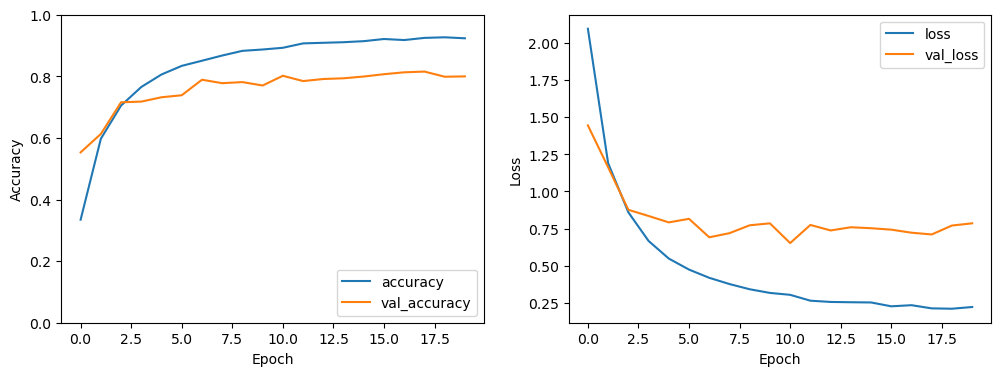

In [11]:
# Evaluate the model
test_loss, test_acc = model.evaluate(X_test, y_test, verbose=2)
print('\nTest accuracy:', test_acc)

# Plot training history
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0, 1])
plt.legend(loc='lower right')

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(loc='upper right')
plt.show()


225/225 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


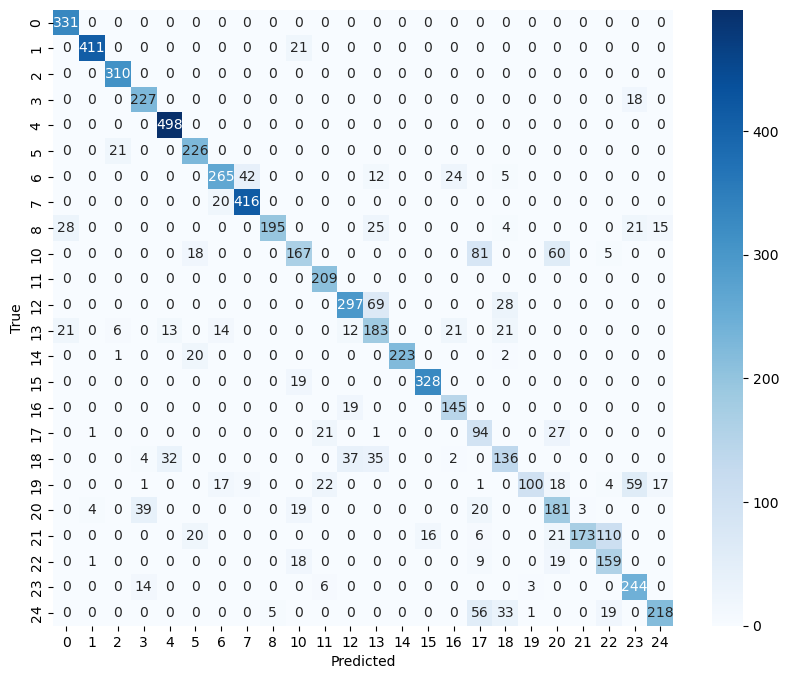

              precision    recall  f1-score   support

           A       0.87      1.00      0.93       331
           B       0.99      0.95      0.97       432
           C       0.92      1.00      0.96       310
           D       0.80      0.93      0.86       245
           E       0.92      1.00      0.96       498
           F       0.80      0.91      0.85       247
           G       0.84      0.76      0.80       348
           H       0.89      0.95      0.92       436
           I       0.97      0.68      0.80       288
           K       0.68      0.50      0.58       331
           L       0.81      1.00      0.90       209
           M       0.81      0.75      0.78       394
           N       0.56      0.63      0.59       291
           O       1.00      0.91      0.95       246
           P       0.95      0.95      0.95       347
           Q       0.76      0.88      0.81       164
           R       0.35      0.65      0.46       144
           S       0.59    

In [12]:
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns

# Predict the values from the test dataset
y_pred = model.predict(X_test)

# Convert predictions classes to one hot vectors
y_pred_classes = np.argmax(y_pred, axis=1)

# Convert test data to one hot vectors
y_true = np.argmax(y_test, axis=1)

# Compute the confusion matrix
conf_matrix = confusion_matrix(y_true, y_pred_classes)

# Plot the confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=lb.classes_, yticklabels=lb.classes_)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

# Classification report
print(classification_report(y_true, y_pred_classes, target_names=[chr(i) for i in range(65, 65 + 26) if i not in (74, 90)]))


####  Comparison of Various Models

1. Simple ANN
2. Convolutional Neural Network (CNN)
3. Deep Convolutional Neural Network (Deep CNN)

In [ ]:
# Step 1: Data Collection and Preprocessing

In [13]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelBinarizer
from sklearn.metrics import confusion_matrix, classification_report
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Dropout, Conv2D, MaxPooling2D

# Load the dataset
train_data = pd.read_csv('sign_mnist_train.csv')
test_data = pd.read_csv('sign_mnist_test.csv')

# Separate features and labels
X_train = train_data.iloc[:, 1:].values
y_train = train_data.iloc[:, 0].values
X_test = test_data.iloc[:, 1:].values
y_test = test_data.iloc[:, 0].values

# Normalize the pixel values
X_train = X_train / 255.0
X_test = X_test / 255.0

# Reshape the data to fit the model
X_train = X_train.reshape(X_train.shape[0], 28, 28, 1)
X_test = X_test.reshape(X_test.shape[0], 28, 28, 1)

# Encode the labels
lb = LabelBinarizer()
y_train = lb.fit_transform(y_train)
y_test = lb.transform(y_test)


In [ ]:
# Step 2: Model Development and Comparison
# Simple ANN 

In [14]:
# Define the Simple ANN model
simple_ann = Sequential([
    Flatten(input_shape=(28, 28, 1)),
    Dense(512, activation='relu'),
    Dropout(0.2),
    Dense(256, activation='relu'),
    Dropout(0.2),
    Dense(24, activation='softmax')
])

# Compile the model
simple_ann.compile(optimizer='adam',
                   loss='categorical_crossentropy',
                   metrics=['accuracy'])

# Train the model
history_ann = simple_ann.fit(X_train, y_train, epochs=20, validation_data=(X_test, y_test))


Epoch 1/20


C:\Users\Priya Milton\anaconda3\Lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


858/858 ━━━━━━━━━━━━━━━━━━━━ 6s 6ms/step - accuracy: 0.2105 - loss: 2.5922 - val_accuracy: 0.5508 - val_loss: 1.3667
Epoch 2/20
858/858 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.5547 - loss: 1.3038 - val_accuracy: 0.6217 - val_loss: 1.2117
Epoch 3/20
858/858 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.6874 - loss: 0.9046 - val_accuracy: 0.7143 - val_loss: 0.8951
Epoch 4/20
858/858 ━━━━━━━━━━━━━━━━━━━━ 6s 6ms/step - accuracy: 0.7533 - loss: 0.6950 - val_accuracy: 0.6951 - val_loss: 0.9077
Epoch 5/20
858/858 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.7952 - loss: 0.5815 - val_accuracy: 0.7655 - val_loss: 0.7802
Epoch 6/20
858/858 ━━━━━━━━━━━━━━━━━━━━ 6s 6ms/step - accuracy: 0.8293 - loss: 0.4826 - val_accuracy: 0.7189 - val_loss: 0.9218
Epoch 7/20
858/858 ━━━━━━━━━━━━━━━━━━━━ 6s 6ms/step - accuracy: 0.8381 - loss: 0.4526 - val_accuracy: 0.7674 - val_loss: 0.7599
Epoch 8/20
858/858 ━━━━━━━━━━━━━━━━━━━━ 6s 6ms/step - accuracy: 0.8673 - loss: 0.3754 - val_accuracy: 0.8051 - val_

In [ ]:
# 2. Convolutional Neural Network (CNN)

In [15]:
# Define the CNN model
cnn = Sequential([
    Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(28, 28, 1)),
    MaxPooling2D(pool_size=(2, 2)),
    Dropout(0.2),
    Flatten(),
    Dense(512, activation='relu'),
    Dropout(0.2),
    Dense(24, activation='softmax')
])

# Compile the model
cnn.compile(optimizer='adam',
            loss='categorical_crossentropy',
            metrics=['accuracy'])

# Train the model
history_cnn = cnn.fit(X_train, y_train, epochs=20, validation_data=(X_test, y_test))


C:\Users\Priya Milton\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/20
858/858 ━━━━━━━━━━━━━━━━━━━━ 22s 24ms/step - accuracy: 0.5543 - loss: 1.6093 - val_accuracy: 0.8317 - val_loss: 0.5559
Epoch 2/20
858/858 ━━━━━━━━━━━━━━━━━━━━ 20s 23ms/step - accuracy: 0.9846 - loss: 0.0888 - val_accuracy: 0.8639 - val_loss: 0.5398
Epoch 3/20
858/858 ━━━━━━━━━━━━━━━━━━━━ 20s 23ms/step - accuracy: 0.9977 - loss: 0.0220 - val_accuracy: 0.8562 - val_loss: 0.5868
Epoch 4/20
858/858 ━━━━━━━━━━━━━━━━━━━━ 20s 24ms/step - accuracy: 0.9992 - loss: 0.0108 - val_accuracy: 0.8416 - val_loss: 0.7155
Epoch 5/20
858/858 ━━━━━━━━━━━━━━━━━━━━ 21s 24ms/step - accuracy: 0.9993 - loss: 0.0078 - val_accuracy: 0.8689 - val_loss: 0.7007
Epoch 6/20
858/858 ━━━━━━━━━━━━━━━━━━━━ 20s 24ms/step - accuracy: 0.9996 - loss: 0.0045 - val_accuracy: 0.8674 - val_loss: 0.6642
Epoch 7/20
858/858 ━━━━━━━━━━━━━━━━━━━━ 21s 24ms/step - accuracy: 0.9975 - loss: 0.0087 - val_accuracy: 0.8636 - val_loss: 0.8083
Epoch 8/20
858/858 ━━━━━━━━━━━━━━━━━━━━ 21s 24ms/step - accuracy: 0.9998 - loss: 0.0021 - 

In [16]:
## 3. Deep Convolutional Neural Network (Deep CNN)
# Define the Deep CNN model
deep_cnn = Sequential([
    Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(28, 28, 1)),
    MaxPooling2D(pool_size=(2, 2)),
    Dropout(0.2),
    Conv2D(64, kernel_size=(3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Dropout(0.2),
    Flatten(),
    Dense(512, activation='relu'),
    Dropout(0.2),
    Dense(24, activation='softmax')
])

# Compile the model
deep_cnn.compile(optimizer='adam',
                 loss='categorical_crossentropy',
                 metrics=['accuracy'])

# Train the model
history_deep_cnn = deep_cnn.fit(X_train, y_train, epochs=20, validation_data=(X_test, y_test))


Epoch 1/20
858/858 ━━━━━━━━━━━━━━━━━━━━ 12s 11ms/step - accuracy: 0.4499 - loss: 1.8274 - val_accuracy: 0.8859 - val_loss: 0.3420
Epoch 2/20
858/858 ━━━━━━━━━━━━━━━━━━━━ 10s 11ms/step - accuracy: 0.9651 - loss: 0.1173 - val_accuracy: 0.9412 - val_loss: 0.2405
Epoch 3/20
858/858 ━━━━━━━━━━━━━━━━━━━━ 10s 11ms/step - accuracy: 0.9886 - loss: 0.0380 - val_accuracy: 0.9399 - val_loss: 0.1973
Epoch 4/20
858/858 ━━━━━━━━━━━━━━━━━━━━ 10s 12ms/step - accuracy: 0.9947 - loss: 0.0195 - val_accuracy: 0.9481 - val_loss: 0.2073
Epoch 5/20
858/858 ━━━━━━━━━━━━━━━━━━━━ 10s 11ms/step - accuracy: 0.9964 - loss: 0.0132 - val_accuracy: 0.9505 - val_loss: 0.2280
Epoch 6/20
858/858 ━━━━━━━━━━━━━━━━━━━━ 9s 11ms/step - accuracy: 0.9954 - loss: 0.0143 - val_accuracy: 0.9491 - val_loss: 0.2385
Epoch 7/20
858/858 ━━━━━━━━━━━━━━━━━━━━ 9s 11ms/step - accuracy: 0.9964 - loss: 0.0111 - val_accuracy: 0.9505 - val_loss: 0.2604
Epoch 8/20
858/858 ━━━━━━━━━━━━━━━━━━━━ 9s 11ms/step - accuracy: 0.9961 - loss: 0.0139 - val

In [ ]:
## Step 3: Model Evaluation

In [17]:
# Evaluate the Simple ANN model
test_loss_ann, test_acc_ann = simple_ann.evaluate(X_test, y_test, verbose=2)
y_pred_ann = simple_ann.predict(X_test)
y_pred_classes_ann = np.argmax(y_pred_ann, axis=1)
y_true = np.argmax(y_test, axis=1)

conf_matrix_ann = confusion_matrix(y_true, y_pred_classes_ann)
print('\nSimple ANN Test accuracy:', test_acc_ann)
print(classification_report(y_true, y_pred_classes_ann, target_names=[chr(i) for i in range(65, 65 + 26) if i not in (74, 90)]))


225/225 - 0s - 2ms/step - accuracy: 0.8063 - loss: 0.7076
225/225 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step

Simple ANN Test accuracy: 0.806330144405365
              precision    recall  f1-score   support

           A       0.88      1.00      0.94       331
           B       1.00      1.00      1.00       432
           C       0.94      1.00      0.97       310
           D       0.91      0.92      0.91       245
           E       0.84      1.00      0.91       498
           F       0.92      1.00      0.96       247
           G       0.76      0.88      0.82       348
           H       1.00      0.95      0.98       436
           I       0.88      0.80      0.84       288
           K       0.90      0.56      0.69       331
           L       0.84      0.92      0.88       209
           M       0.79      0.59      0.67       394
           N       0.65      0.55      0.59       291
           O       1.00      0.75      0.86       246
           P       0.91      1.00      0.95  

In [18]:
# Evaluate the CNN model
test_loss_cnn, test_acc_cnn = cnn.evaluate(X_test, y_test, verbose=2)
y_pred_cnn = cnn.predict(X_test)
y_pred_classes_cnn = np.argmax(y_pred_cnn, axis=1)

conf_matrix_cnn = confusion_matrix(y_true, y_pred_classes_cnn)
print('\nCNN Test accuracy:', test_acc_cnn)
print(classification_report(y_true, y_pred_classes_cnn, target_names=[chr(i) for i in range(65, 65 + 26) if i not in (74, 90)]))


225/225 - 1s - 4ms/step - accuracy: 0.8745 - loss: 1.0343
225/225 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step

CNN Test accuracy: 0.8745120167732239
              precision    recall  f1-score   support

           A       0.89      1.00      0.94       331
           B       1.00      0.95      0.97       432
           C       1.00      0.93      0.96       310
           D       1.00      1.00      1.00       245
           E       0.93      0.96      0.94       498
           F       0.92      1.00      0.96       247
           G       0.88      0.83      0.85       348
           H       0.84      0.91      0.87       436
           I       1.00      0.78      0.88       288
           K       0.80      0.89      0.84       331
           L       0.85      1.00      0.92       209
           M       0.86      0.68      0.76       394
           N       0.83      0.70      0.76       291
           O       0.93      0.91      0.92       246
           P       0.95      1.00      0.97       3

In [19]:
# Evaluate the Deep CNN model
test_loss_deep_cnn, test_acc_deep_cnn = deep_cnn.evaluate(X_test, y_test, verbose=2)
y_pred_deep_cnn = deep_cnn.predict(X_test)
y_pred_classes_deep_cnn = np.argmax(y_pred_deep_cnn, axis=1)

conf_matrix_deep_cnn = confusion_matrix(y_true, y_pred_classes_deep_cnn)
print('\nDeep CNN Test accuracy:', test_acc_deep_cnn)
print(classification_report(y_true, y_pred_classes_deep_cnn, target_names=[chr(i) for i in range(65, 65 + 26) if i not in (74, 90)]))


225/225 - 1s - 5ms/step - accuracy: 0.9470 - loss: 0.3383
225/225 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step

Deep CNN Test accuracy: 0.947016179561615
              precision    recall  f1-score   support

           A       0.95      1.00      0.97       331
           B       1.00      0.95      0.98       432
           C       1.00      1.00      1.00       310
           D       1.00      0.93      0.96       245
           E       0.96      1.00      0.98       498
           F       1.00      1.00      1.00       247
           G       0.94      0.94      0.94       348
           H       1.00      0.95      0.98       436
           I       0.87      0.89      0.88       288
           K       0.92      0.89      0.90       331
           L       0.92      1.00      0.96       209
           M       0.94      0.89      0.92       394
           N       1.00      0.86      0.92       291
           O       1.00      1.00      1.00       246
           P       0.94      1.00      0.97    

Simple ANN Test accuracy: 0.806330144405365
CNN Test accuracy: 0.8745120167732239
Deep CNN Test accuracy: 0.947016179561615


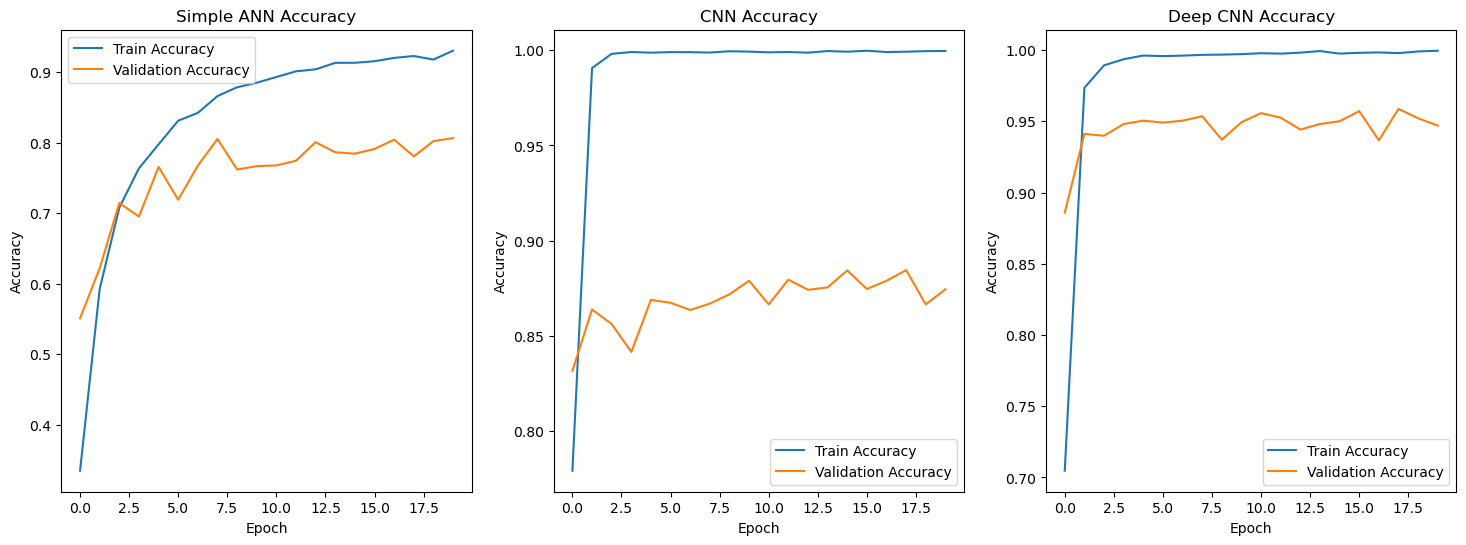

In [20]:
# Compare test accuracies
print(f'Simple ANN Test accuracy: {test_acc_ann}')
print(f'CNN Test accuracy: {test_acc_cnn}')
print(f'Deep CNN Test accuracy: {test_acc_deep_cnn}')

# Plot training history for all models
plt.figure(figsize=(18, 6))

plt.subplot(1, 3, 1)
plt.plot(history_ann.history['accuracy'], label='Train Accuracy')
plt.plot(history_ann.history['val_accuracy'], label='Validation Accuracy')
plt.title('Simple ANN Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 3, 2)
plt.plot(history_cnn.history['accuracy'], label='Train Accuracy')
plt.plot(history_cnn.history['val_accuracy'], label='Validation Accuracy')
plt.title('CNN Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 3, 3)
plt.plot(history_deep_cnn.history['accuracy'], label='Train Accuracy')
plt.plot(history_deep_cnn.history['val_accuracy'], label='Validation Accuracy')
plt.title('Deep CNN Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.show()
